In [206]:

# importing typical packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [164]:
# load data
df = pd.read_csv('Data/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [165]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [166]:
# rename class to fraud so it it more clear
df = df.rename(columns={'Class': 'Fraud'})

In [167]:
# print proportions of valid and fraudulent transactions
print(df.Fraud.value_counts())
print()
print(df.Fraud.value_counts(normalize=True))

0    284315
1       492
Name: Fraud, dtype: int64

0    0.998273
1    0.001727
Name: Fraud, dtype: float64


In [168]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


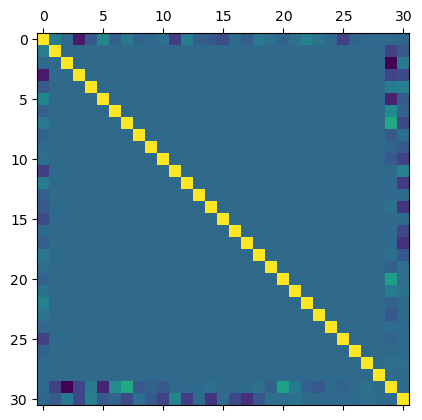

In [169]:
# plot grids to show correlation between features
plt.matshow(df.corr())

In [170]:
df.Fraud.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Fraud, dtype: float64

## Create basic logistic regression

In [171]:
# Gets X and y given dataframe
def get_X_y(df):
    X = df.drop('Fraud', axis=1)
    y = df[['Fraud']]
    return X, y

In [253]:
def normalize(df):
    col_names = df.columns
    values = df.values
    scaler = preprocessing.MinMaxScaler()
    values_scaled = scaler.fit_transform(values)
    df = pd.DataFrame(values_scaled, columns=col_names)
    return df

In [173]:
# Given a dataframe, returns a logistic regression model, X_test split, and y_test split
def train_logistic_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
    
    # normalize train and test sets
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    y_train = normalize(y_train)
    y_test = normalize(y_test)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    return model, X_test, y_test

In [174]:
def print_metrics(y, predictions):
    print(f'Accuracy: {accuracy_score(y, predictions)}')
    print(f'Precision: {precision_score(y, predictions)}')
    print(f'Recall: {recall_score(y, predictions)}')
    print(f'F1 Score: {f1_score(y, predictions)}')

In [218]:
def display_roc_auc(model, X, y):
    probabilities = model.predict_proba(X)[::,1]
    fpr, tpr, thresholds = roc_curve(y, probabilities)
    auc = roc_auc_score(y, probabilities)
    # plot
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print(f'AUC: {auc}')

In [219]:
# given a logistic regression model, X_test split, and y_test split returns a confusion matrix
# and prints several metrics
def plot_confusion_matrix(model, X_test, y_test):
    test_predictions = model.predict(X_test)

    score = model.score(X_test, y_test)

    confusion_matrix = metrics.confusion_matrix(y_test, test_predictions)

    plt.figure(figsize=(6,6))
    sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    title = f'Accuracy Score: {score}'
    plt.title(title, size = 15);
    
    print('Test:')
    print_metrics(y_test, test_predictions)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test:
Accuracy: 0.9988343024072357
Precision: 0.803030303030303
Recall: 0.43089430894308944
F1 Score: 0.5608465608465608


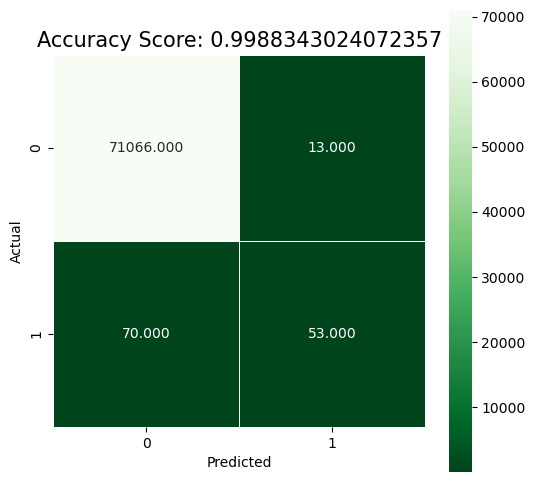

In [220]:
# basic logistic regression
X_base, y_base = get_X_y(df)
model_1, X_test_base, y_test_base = train_logistic_regression(X_base, y_base)
plot_confusion_matrix(model_1, X_test_base, y_test_base)

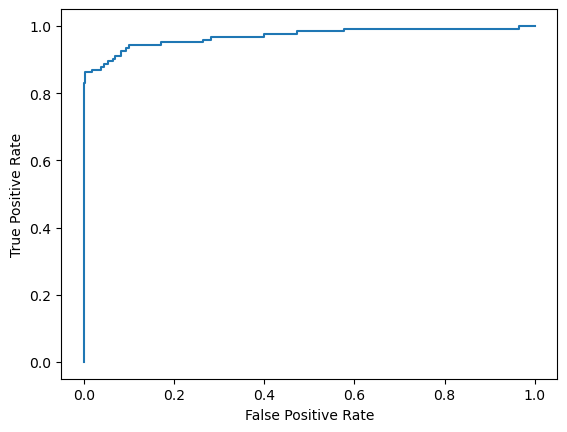

AUC: 0.9690625923268474


In [221]:
display_roc_auc(model_1, X_test_base, y_test_base)

## Resample data

In [177]:
# https://www.researchgate.net/publication/339986048_Methods_of_Handling_Unbalanced_Datasets_in_Credit_Card_Fraud_Detection
# SMOTE (Static or Dynamic)
# Oversampling
# Undersampling
# Hybrid

In [178]:
# seperate transaction types to make sampling easier
fraud = df[df['Fraud'] == 1]
valid = df[df['Fraud'] == 0]
print(fraud.shape)
print(valid.shape)

(492, 31)
(284315, 31)


### Undersampling

In [350]:
sampler = RandomUnderSampler(sampling_strategy= 0.024, random_state=42) # sampling strategy sets the proportion of the minority to the majority class
X_under, y_under = sampler.fit_resample(X_base, y_base)

In [351]:
y_under.value_counts()

Fraud
0        20500
1          492
dtype: int64

Undersampling seems to perform best with the minority class comprising 2.4% of the original dataset. This makes the majority class about 7.3% of its original size. This may be a good starting point for further testing, but should suffice for now.

Test:
Accuracy: 0.993140243902439
Precision: 0.9887640449438202
Recall: 0.7154471544715447
F1 Score: 0.830188679245283


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


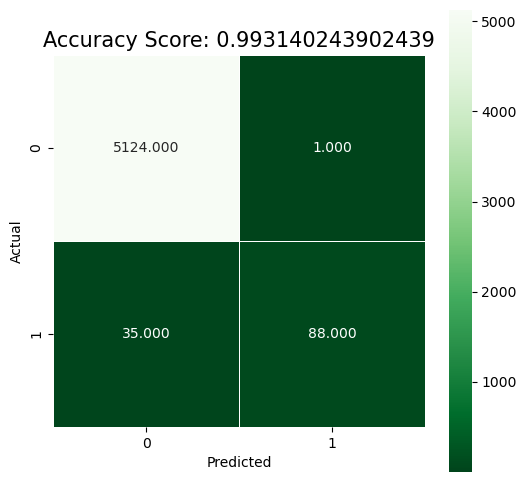

In [352]:
# Logistic regression, undersampled
model_2, X_test_under, y_test_under = train_logistic_regression(X_under, y_under)
plot_confusion_matrix(model_2, X_test_under, y_test_under)

Test:
Accuracy: 0.9983708322799921
Precision: 0.5177664974619289
Recall: 0.8292682926829268
F1 Score: 0.6375000000000001


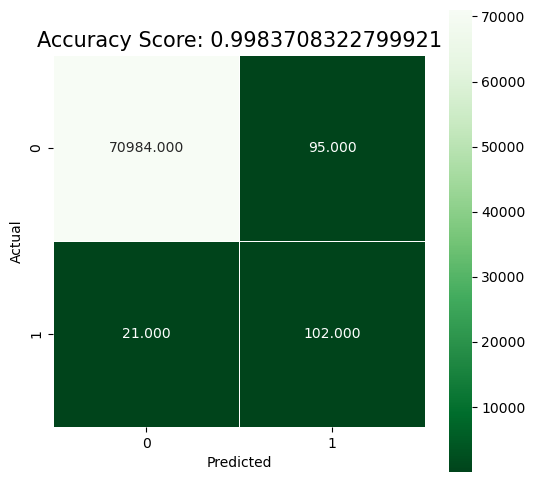

In [353]:
# test undersampled model against unmodified base test data
plot_confusion_matrix(model_2, X_test_base, y_test_base)

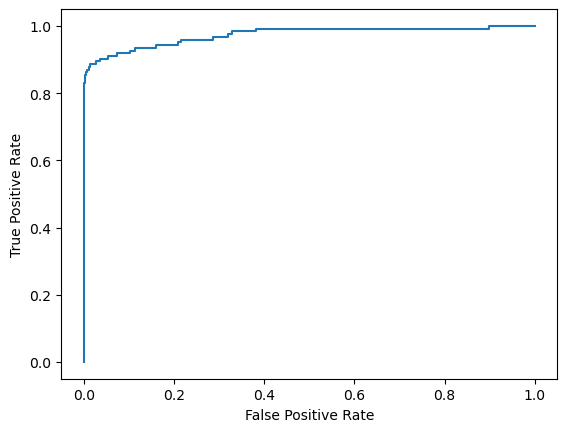

AUC: 0.9734330872199111


In [355]:
display_roc_auc(model_2, X_test_base, y_test_base) # .024

In [364]:
print((0.9734330872199111 - 0.9690625923268474) * 100,'%')

0.43704948930636256 %


### Synthetic Oversampling with SMOTE

In [567]:
# This cell combines SMOTE oversampling of the minority class with undersampling of the majority class

oversample = SMOTE()
# synthetically upsample fraudulent cases to comprise 7% of dataset
over = SMOTE(sampling_strategy=0.07, random_state=42)
# random sampling to reduce majority class to 50% more than minority class (NOT CURRENTLY IMPLEMENTED)
# under = RandomUnderSampler(sampling_strategy=0.5)
smote_over_under = Pipeline([('over', over),
#                             ('under', under)
                             ])

Appears to perform best when upsampling minority cases to be around 7% of dataset, or roughly 20,000 (40 times the size of the original minority set)

In [568]:
X_smote, y_smote = smote_over_under.fit_resample(X_base, y_base)

In [574]:
y_smote.value_counts()

Fraud
0        284315
1         19902
dtype: int64

In [569]:
X_smote

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304212,166154.165876,-5.005001,-6.921022,-0.186243,5.756338,7.865502,-4.510713,-3.805396,0.339283,-0.869933,...,1.992180,0.636842,0.013385,1.884825,0.683916,-1.534062,-0.218993,0.161979,0.446195,129.222488
304213,160777.980056,-1.103598,4.533202,-7.396268,6.282364,-0.053703,-2.866829,-3.046710,1.186007,-4.236554,...,0.638805,0.719559,-0.276002,-0.180203,-0.646650,-0.276452,0.412753,0.713432,0.352789,0.679893
304214,84045.249084,-1.048896,2.180846,-5.242049,5.067841,-2.184806,-1.213304,-4.803413,1.252530,-3.418934,...,1.333281,0.986893,-0.566788,-0.506521,-0.629258,0.862260,0.575165,1.170007,0.655666,211.652200
304215,134286.500744,1.454371,1.818615,-4.458670,3.439519,1.243612,-1.300666,-0.433633,0.059732,-1.552771,...,0.257105,-0.005768,-0.684879,-0.012522,0.138856,0.226475,-0.009822,0.282493,0.196329,43.966000


In [570]:
y_smote.value_counts()

Fraud
0        284315
1         19902
dtype: int64

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test:
Accuracy: 0.9789231477220433
Precision: 0.9955921245959447
Recall: 0.6808681672025724
F1 Score: 0.8086883876357561


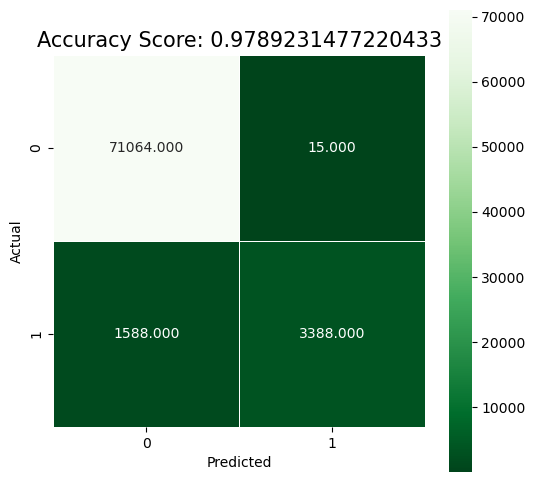

In [571]:
# Logistic regression model trained with hybrid SMOTE and undersampling
model_3, X_test_smote, y_test_smote = train_logistic_regression(X_smote, y_smote)
plot_confusion_matrix(model_3, X_test_smote, y_test_smote)

Test:
Accuracy: 0.9991994606893064
Precision: 0.8367346938775511
Recall: 0.6666666666666666
F1 Score: 0.7420814479638008


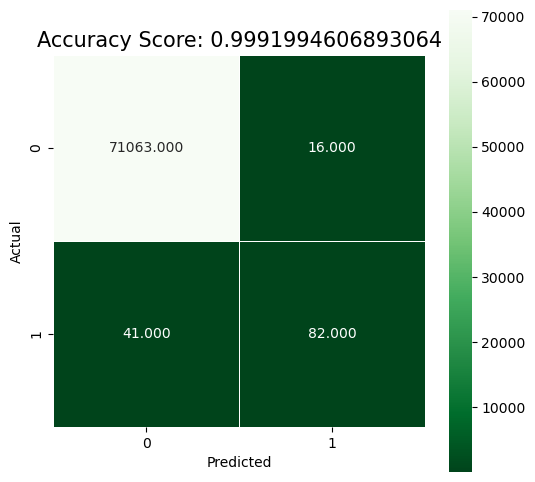

In [572]:
# test undersampled model against unmodified base test data
plot_confusion_matrix(model_3, X_test_base, y_test_base)

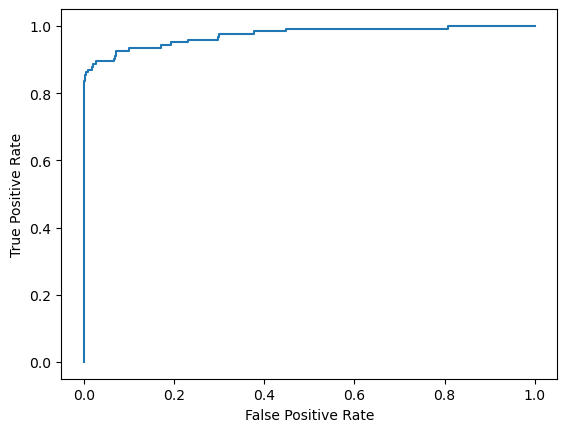

AUC: 0.9732059267159168


In [573]:
display_roc_auc(model_3, X_test_base, y_test_base) # 0.07

In [576]:
(0.9732059267159168 - 0.9690625923268474)  * 100

0.4143334389069331

### SMOTE again but with less oversampling and more undersampling

In [188]:
# This cell combines SMOTE oversampling of the minority class with undersampling of the majority class

oversample = SMOTE()
# synthetically upsample fraudulent cases to comprise 10% of dataset
over = SMOTE(sampling_strategy=0.005) # original proportion .0017
# random sampling to reduce majority class to 50% more than minority class
under = RandomUnderSampler(sampling_strategy=0.5)
smote_over_under = Pipeline([('over', over), ('under', under)])

X_smote_under, y_smote_under = smote_over_under.fit_resample(X_base, y_base)

Test:
Accuracy: 0.9521575984990619
Precision: 0.9935064935064936
Recall: 0.8619718309859155
F1 Score: 0.923076923076923


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


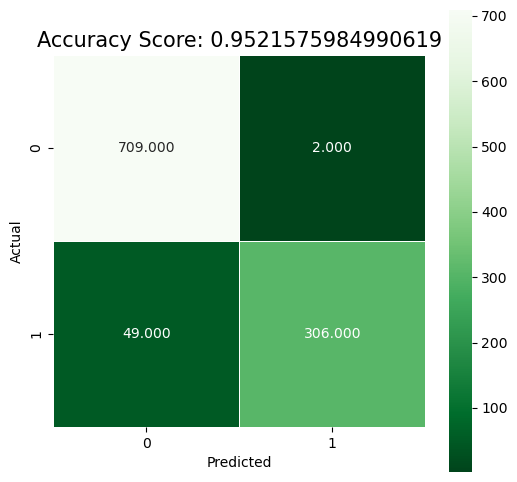

In [189]:
# Logistic regression model trained with hybrid SMOTE and undersampling
model_4, X_test_smote_under, y_test_smote_under = train_logistic_regression(X_smote_under, y_smote_under)
plot_confusion_matrix(model_4, X_test_smote_under, y_test_smote_under)

Test:
Accuracy: 0.9964045953765344
Precision: 0.30612244897959184
Recall: 0.8536585365853658
F1 Score: 0.4506437768240344


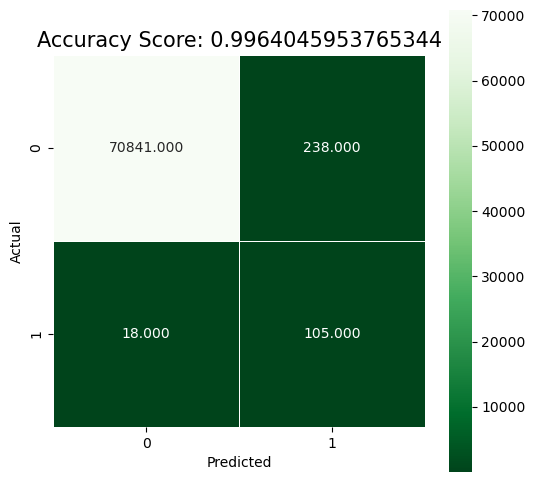

In [28]:
# test undersampled model against unmodified base test data
plot_confusion_matrix(model_4, X_test_base, y_test_base)

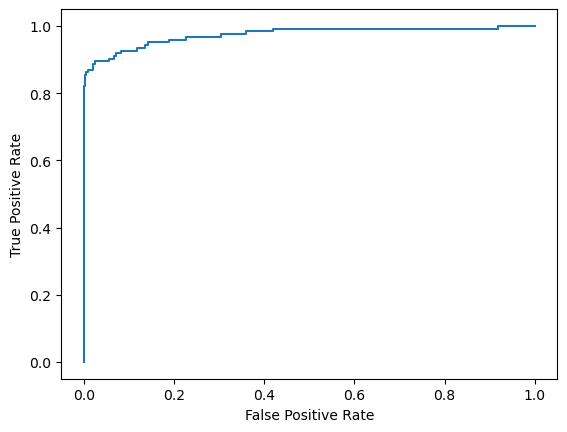

AUC: 0.9740044199074498


In [224]:
display_roc_auc(model_4, X_test_base, y_test_base)